In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = pd.read_excel('../data/performance_p1.xlsx')

In [4]:
len(data)

320

In [5]:
data.head()

,Unnamed: 0,day,num,time,train,val,aug,size
0,100,2019-03-19,380,2019-03-19 12:21:56,0.531470,0.551423,True,256
1,101,2019-03-19,380,2019-03-19 12:23:51,0.463102,0.547906,True,256
2,102,2019-03-19,380,2019-03-19 12:25:45,0.489086,0.538634,True,256
3,103,2019-03-19,380,2019-03-19 12:27:39,0.466220,0.539486,True,256
4,104,2019-03-19,380,2019-03-19 12:29:33,0.507795,0.536396,True,256


In [46]:
data['Model Size'] = np.where(data['size'] == 256, 'Normal', 'Large')
english_plot = data.rename({'aug':'data augmentation', 'num':'data number', 'val':'c index in test', 'train':'c index in train'}, axis=1)

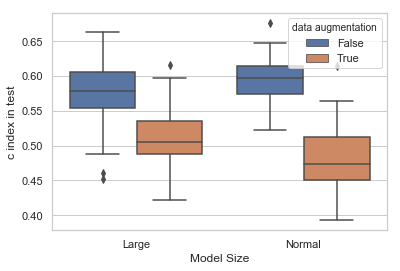

In [49]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(x="Model Size", y="c index in test", hue="data augmentation", data=english_plot.loc[english_plot['data number']!=380])
plt.savefig('se_para.png', dpi=300)

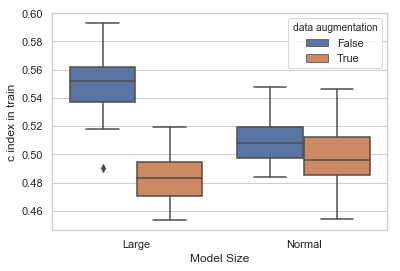

In [50]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(x="Model Size", y="c index in train", hue="data augmentation", data=english_plot.loc[english_plot['data number']!=380])
plt.savefig('ste_para.png', dpi=300)

In [13]:
data['模型大小'] = np.where(data['size'] == 256, '正常',  '增大')

In [19]:
chinese_plot = data.rename({'aug':'是否数据增强', 'num':'数据量', 'val':'测试集c index', 'train':'训练集c index'}, axis=1)

In [51]:
import matplotlib as mpl

sns.set(style="whitegrid")
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']

sns.set_style("whitegrid",{"font.sans-serif":['simhei', 'Arial']})

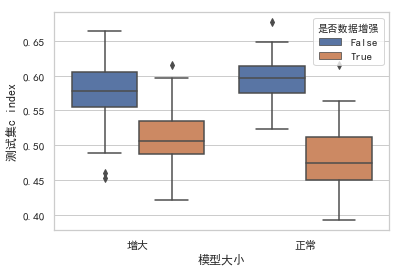

In [52]:
plt.figure()
sns.boxplot(x="模型大小", y="测试集c index", hue="是否数据增强", data=chinese_plot.loc[chinese_plot['数据量']!=380])
plt.savefig('s_para.png', dpi=300)

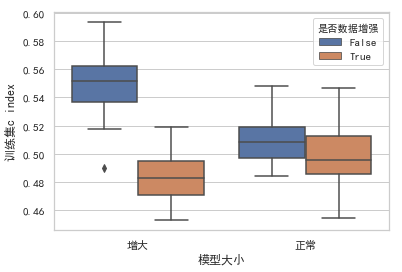

In [53]:
plt.figure()
sns.boxplot(x="模型大小", y="训练集c index", hue="是否数据增强", data=chinese_plot.loc[chinese_plot['数据量']!=380])
plt.savefig('st_para.png', dpi=300)